In [78]:
import numpy as np
import pandas as pd
import random

df = pd.read_csv('Sprint 1 - Movies Data Set Analysis/movies.csv') # Gathering data
df = df.drop(columns=['Summary']) # remove the column "Summary"
df.columns = df.columns.str.lower().str.replace(' ', '_') # Make all the column names lowercase and replace spaces with underscores
df.drop(df.tail(1).index, inplace=True) # Remove the last row of the DF (containing NaNs)

In [79]:
display(df.tail(5)) # See the first five rows of the Data Frame

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,NaN,NaN
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,NaN,NaN
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,NaN,NaN
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,NaN,NaN


In [80]:
# Fill NaNs with a random value between (mean — 2 * std) & (mean + 2 * std)

def nan_rand_fill(data, key):
    mn = data[key].mean()
    sd = data[key].std()
    low_l = mn - 2 * sd
    high_l = mn + 2 * sd
    nans = data[key].isna()
    df.loc[nans, key] = [abs(np.floor(random.uniform(low_l, high_l))) if 'count' in key 
    else abs(round(random.uniform(low_l, high_l), 1)) for i in range(nans.sum())]

nan_rand_fill(df, 'rating')
nan_rand_fill(df, 'rating_count')

In [81]:
# Fill NaNs with a median value
# df["rating"].fillna(value=df["rating"].median(), inplace=True)

In [82]:
display(df.tail(5)) # See the first five rows of the Data Frame

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,5.8,184775.0
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,6.3,500124.0
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,6.5,958851.0
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,7.4,32347.0
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,7.0,251390.0


In [83]:
print(df.shape) # Shape of the Data Frame

(615, 10)


In [84]:
print(df.dtypes) # Column names with their data types

movieid           int64
title            object
mpaa_rating      object
budget          float64
gross           float64
release_date     object
genre            object
runtime         float64
rating          float64
rating_count    float64
dtype: object


In [85]:
print(df.columns) # Column names

Index(['movieid', 'title', 'mpaa_rating', 'budget', 'gross', 'release_date',
       'genre', 'runtime', 'rating', 'rating_count'],
      dtype='object')


In [86]:
print(df.isna().sum()) # Column names with their NaN count

movieid         0
title           0
mpaa_rating     0
budget          0
gross           0
release_date    0
genre           0
runtime         0
rating          0
rating_count    0
dtype: int64


In [87]:
df.drop_duplicates(subset=['title', 'release_date']) # Remove row duplicates by title and release date

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
0,1,Look Who's Talking,PG-13,7500000.0,2.960000e+08,1989-10-12,Romance,93.0,5.9,73638.0
1,2,Driving Miss Daisy,PG,7500000.0,1.457933e+08,1989-12-13,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000.0,7.107992e+07,1989-07-28,Crime,100.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000.0,1.610017e+08,1989-12-20,War,145.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000.0,8.443162e+07,1989-04-21,Drama,107.0,7.5,101702.0
...,...,...,...,...,...,...,...,...,...,...
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,5.8,184775.0
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,6.3,500124.0
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,6.5,958851.0
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,7.4,32347.0


In [88]:
# Convert data types (Converted float64 to int64 so the high gross and budget values won't overflow the int)

df['budget'] = df['budget'].astype(np.int64)
df['gross'] = df['gross'].astype(np.int64, errors='raise')
df['release_date'] = pd.to_datetime(df['release_date'])

In [89]:
print(df.dtypes)

movieid                  int64
title                   object
mpaa_rating             object
budget                   int64
gross                    int64
release_date    datetime64[ns]
genre                   object
runtime                float64
rating                 float64
rating_count           float64
dtype: object


In [90]:
df.tail(10)

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
605,606,Pokemon Detective Pikachu,PG,150000000,431600000,2019-05-03,Mystery,104.0,5.3,942556.0
606,607,Spider-Man: Far from Home,PG-13,160000000,1131000000,2019-06-26,Action,129.0,8.4,171846.0
607,608,Dumbo,PG,170000000,353000000,2019-03-11,Adventure,112.0,7.4,471773.0
608,609,Captain Marvel,PG-13,175000000,1128000000,2019-02-27,Action,124.0,5.6,46175.0
609,610,Aladdin,PG,183000000,1049000000,2019-05-08,Fantasy,128.0,7.6,97474.0
610,611,Godzilla: King of the Monsters,PG-13,200000000,385900000,2019-05-13,Adventure,132.0,5.8,184775.0
611,612,Toy Story 4,G,200000000,1062000000,2019-06-11,Animation,100.0,6.3,500124.0
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000,759400000,2019-07-13,Thriller,136.0,6.5,958851.0
613,614,The Lion King,PG,250000000,1632000000,2019-07-09,Drama,118.0,7.4,32347.0
614,615,Avengers: Endgame,PG-13,356000000,2796000000,2019-04-22,Action,181.0,7.0,251390.0


In [91]:
# Show the movies with more than 7 in Rating & greater than 50 million Gross
display(df[(df['rating'] > 7) & (df['gross'] > 50000000)])

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,145.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107.0,7.5,101702.0
6,7,When Harry Met Sally...,R,16000000,92800000,1989-07-21,Romance,96.0,7.6,180871.0
...,...,...,...,...,...,...,...,...,...,...
604,605,How to Train Your Dragon: The Hidden World,PG,129000000,519900000,2019-01-03,Animation,104.0,7.9,561440.0
606,607,Spider-Man: Far from Home,PG-13,160000000,1131000000,2019-06-26,Action,129.0,8.4,171846.0
607,608,Dumbo,PG,170000000,353000000,2019-03-11,Adventure,112.0,7.4,471773.0
609,610,Aladdin,PG,183000000,1049000000,2019-05-08,Fantasy,128.0,7.6,97474.0


In [92]:
# Show the movies with more than 7 in Rating & greater than 50 million Gross & with Parental guidance as MPAA Rating
display(df[(df['rating'] > 7) & (df['gross'] > 50000000) & (df['mpaa_rating'] == 'PG')])

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107.0,7.5,101702.0
7,8,Dead Poets Society,PG,16400000,235860116,1989-06-02,Drama,129.0,8.1,382002.0
13,14,Batman,PG,35000000,411348924,1989-06-23,Action,126.0,7.5,319517.0
...,...,...,...,...,...,...,...,...,...,...
591,592,Incredibles 2,PG,200000000,1242000000,2018-06-05,Animation,118.0,7.7,653711.0
604,605,How to Train Your Dragon: The Hidden World,PG,129000000,519900000,2019-01-03,Animation,104.0,7.9,561440.0
607,608,Dumbo,PG,170000000,353000000,2019-03-11,Adventure,112.0,7.4,471773.0
609,610,Aladdin,PG,183000000,1049000000,2019-05-08,Fantasy,128.0,7.6,97474.0


In [93]:
# Count of Animation movies with more than 7 in Rating (use the shape() function)
print(df[(df['genre'] == 'Animation') & (df['rating'] > 7)].shape[0])

49


In [94]:
# Show the list of top 5 movies based on Budget
display(df.sort_values('budget', ascending=False).head(5))

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
594,595,Avengers: Infinity War,PG-13,400000000,2048000000,2018-04-23,Action,149.0,8.6,79981.0
454,455,Pirates of the Caribbean: On Stranger Tides,PG-13,380000000,1045713802,2011-05-14,Action,136.0,6.6,455211.0
614,615,Avengers: Endgame,PG-13,356000000,2796000000,2019-04-22,Action,181.0,7.0,251390.0
574,575,Star Wars: The Last Jedi,PG-13,317000000,1333000000,2019-12-09,Science Fiction,152.0,7.0,147775.0
375,376,Pirates of the Caribbean: At World's End,PG-13,300000000,961000000,2007-05-19,Adventure,169.0,7.1,565402.0


In [95]:
# Show the top 5 Comedy movies by Rating
display(df[df['genre'] == 'Comedy'].sort_values('rating', ascending=False).head(5))

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
111,112,Forrest Gump,PG-13,55000000,677945399,1994-07-06,Comedy,142.0,8.8,1657851.0
185,186,The Truman Show,PG,60000000,264118201,1998-06-04,Comedy,103.0,8.1,859224.0
80,81,Groundhog Day,PG,14600000,70906973,1993-02-11,Comedy,101.0,8.0,549538.0
254,255,"Monsters, Inc.",G,115000000,562816256,2001-11-01,Comedy,92.0,8.0,758349.0
399,400,The Hangover,R,35000000,459270619,2009-06-05,Comedy,100.0,7.7,681246.0


In [96]:
# Top 5 movie names by Rating
print(df.loc[df.sort_values('rating', ascending=False).head(5).index, 'title'])

393                                  The Dark Knight
98                                 Jurassic Park III
99                                      Pulp Fiction
83                                  Schindler's List
287    The Lord of the Rings: The Return of the King
Name: title, dtype: object


In [97]:
# Top 3 high Gross Romance movies released after 1999, not included (typecast it to datetime)
print(df.loc[df[(df['genre'] == 'Romance') & (df['release_date'] > pd.Timestamp('1999-12-31'))].sort_values('gross', ascending=False).head(3).index, 'title'])

464    The Twilight Saga: Breaking Dawn - Part 2
442    The Twilight Saga: Breaking Dawn - Part 1
401                  The Twilight Saga: New Moon
Name: title, dtype: object


In [98]:
# How many Genres are present in the dataframe? (use the function value_counts() which applies to Series, not Dataframe)
print(df['genre'].value_counts())

Action             110
Comedy              99
Animation           87
Drama               66
Thriller            41
Science Fiction     37
Adventure           30
Family              29
Romance             28
Fantasy             27
Crime               17
Horror              14
Mystery             11
War                  9
Western              6
History              4
Name: genre, dtype: int64


In [99]:
# Top 5 expensive movies released after 1999, not included (measured by Budget)
print(df.loc[df[df['release_date'] > pd.Timestamp('1999-12-31')].sort_values('budget', ascending=False).head(5).index, 'title'])

594                         Avengers: Infinity War
454    Pirates of the Caribbean: On Stranger Tides
614                              Avengers: Endgame
574                       Star Wars: The Last Jedi
573                                 Justice League
Name: title, dtype: object


In [100]:
# Most & least frequent MPAA Rating in the dataset in terms of occurrences
# print(df['mpaa_rating'].value_counts())
print(f"The most frequent MPAA Rating is {df['mpaa_rating'].value_counts().index[0]}")
print(f"The most frequent MPAA Rating is {df['mpaa_rating'].mode()[0]}")
print(f"The least frequent MPAA Rating is {df['mpaa_rating'].value_counts().index[-1]}")

The most frequent MPAA Rating is PG-13
The most frequent MPAA Rating is PG-13
The least frequent MPAA Rating is G


In [101]:
# Most and least expensive Genre (take an average of all Budget measures grouped by Genre - use groupBy() method)
print(f"Most expensive genre is {df.groupby('genre')['budget'].mean().sort_values(ascending=False).index[0]}")
print(f"Least expensiv genre is {df.groupby('genre')['budget'].mean().sort_values(ascending=False).index[-1]}")

Most expensive genre is Fantasy
Least expensiv genre is Horror


In [102]:
# Which Genre is favored the most by the people?
# print(df.groupby('genre')['rating'].mean().sort_values(ascending=False))
print(f"The most favored genre is {df.groupby('genre')['gross'].mean().sort_values(ascending=False).index[0]}")

The most favored genre is Fantasy


Text(0.5, 0, 'Genres')

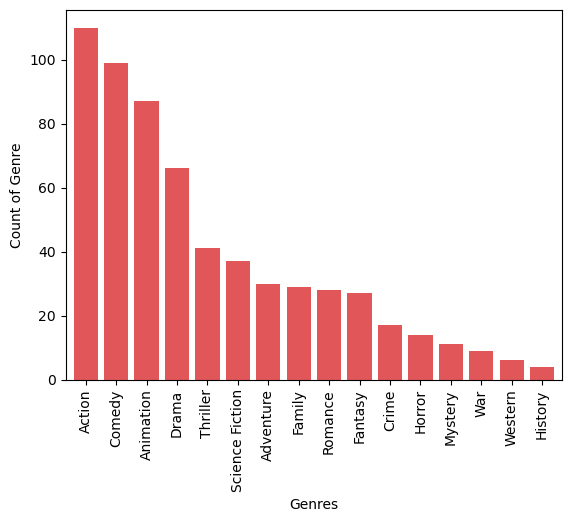

In [111]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar', color='#E15759', width=0.8)
plt.ylabel("Count of Genre")
plt.xlabel("Genres")